In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('min_rows', 1000)

In [3]:
profit_df_2021 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\profit\AmazonProfit2021JanMay.xlsx').drop_duplicates()

profit_df_april = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\2021_04_AmazonProfit for Analyst April.xlsx').drop_duplicates()
profit_df_april.columns = ['order id w/o doubles', 'Gross Profit']

profit_df_june = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\2021_06_AmazonProfit for Analytic.xlsx').drop_duplicates()
profit_df_june.columns = ['order id w/o doubles', 'Gross Profit']

frames = [profit_df_2021, profit_df_april, profit_df_june]

profit_df = pd.concat(frames)

In [4]:
Jan_Feb_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\Az.xlsx')
April_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\April.xlsx')
May_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\May.xlsx')
June_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\June.xlsx')

In [5]:
frames = [April_df, May_df, June_df, Jan_Feb_df]

sales_df = pd.concat(frames)

In [6]:
sales_df = sales_df[(sales_df["order-status"] != 'Cancelled') & (sales_df["fulfillment-channel"] != 'Amazon')]
sales_df = sales_df[["asin", "amazon-order-id","ship-state","sku","item-price", "purchase-date"]]

In [7]:
date1 = "2020-12-31"
date2 = "2021-07-01"

In [8]:
sales_df = sales_df[(sales_df['purchase-date'] > date1) & (sales_df['purchase-date'] < date2)]

In [9]:
z = pd.merge(sales_df, profit_df, left_on=["amazon-order-id"], right_on=['order id w/o doubles'], how='inner').drop_duplicates()

In [10]:
category_listing_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Category Listing_full_table.csv')
category_listing_df = category_listing_df[["Product Type", "Product ID"]]

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,

In [11]:
a = pd.merge(z, category_listing_df, left_on=["asin"], right_on=['Product ID'], how='left').drop_duplicates()

In [12]:
amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')

conditions = [
    (amazon_inventory_df[["ct_map_price"]] > 0),
    (amazon_inventory_df[["ct_map_price"]] < 0),
]

choices = [True, False]
amazon_inventory_df[["map_used"]] = np.select(conditions, choices, default=None)
amazon_inventory_df = amazon_inventory_df[["msin", "rid","map_used","ct_map_price"]]

In [13]:
#amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')
#o = amazon_inventory_df[["ct_map_price", "msin"]].drop_duplicates()

#o.sort_values(['ct_map_price'], ascending=[False])

#o1 = (o.loc[o['ct_map_price'].isnull()])
#o2 = (o1.loc[o['ct_map_price'] < 1])
#o1

In [14]:
b = pd.merge(a, amazon_inventory_df, left_on=["asin"], right_on=['msin'], how='left').drop_duplicates()

In [15]:
central_catalog_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Central Catalog_full_table.csv')
central_catalog_df = central_catalog_df[["id", "brand_id"]]

In [16]:
c = pd.merge(b, central_catalog_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [17]:
dimension_store_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Dimension Store_full_table.csv')
dimension_store_df = dimension_store_df[["id", "width", "height", "length", "weight", "is_dangerous","image"]]
dimension_store_df['is_image'] = np.where(dimension_store_df['image'].notnull(), True, False)

In [18]:
d = pd.merge(c, dimension_store_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [19]:
map_rules_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Map Rules_full_table.csv')
map_rules_df = map_rules_df[["brand"]]
map_rules_df['map'] = np.where(map_rules_df['brand']!= '', True, False)
map_rules_df = map_rules_df.drop_duplicates()

In [20]:
e = pd.merge(d, map_rules_df, left_on=["brand_id"], right_on=['brand'], how='left').drop_duplicates()

In [21]:
e = e[["asin", "amazon-order-id","ship-state","sku","item-price", "rid", "Product Type","brand_id", "width", "height", "length", "weight", "is_dangerous", 'map', 'is_image', "purchase-date","Gross Profit", "map_used","ct_map_price"]]

In [22]:
p1 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_PartsUnlimited.xlsx')
p1 = p1[['mpOrderNumber']]
p1['Sr name'] = np.where(p1['mpOrderNumber']!= '', 'PartsUnlimited', True)
p1['is_dropship'] = np.where(p1['mpOrderNumber']!= '', "Pickup", True)

p2 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RollunOffice.xlsx')
p2 = p2[['mpOrderNumber']]
p2['Sr name'] = np.where(p2['mpOrderNumber']!= '', 'RollunOffice', True)
p2['is_dropship'] = np.where(p2['mpOrderNumber']!= '', "Pickup", True)

p3 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_TuckerRocky.xlsx')
p3 = p3[['mpOrderNumber']]
p3['Sr name'] = np.where(p3['mpOrderNumber']!= '', 'TuckerRocky', True)
p3['is_dropship'] = np.where(p3['mpOrderNumber']!= '', "Pickup", True)

p4 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RockyMountain.xlsx')
p4 = p4[['mpOrderNumber']]
p4['Sr name'] = np.where(p4['mpOrderNumber']!= '', 'RockyMountain', True)
p4['is_dropship'] = np.where(p4['mpOrderNumber']!= '', "Pickup", True)

dropship_price_info_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\dropship.xlsx')
dropship_price_info_df = dropship_price_info_df[["MP order number", "Sr name"]]
dropship_price_info_df['is_dropship'] = np.where(dropship_price_info_df['MP order number']!= '', "Dropship", False)
dropship_price_info_df[['mpOrderNumber']] = dropship_price_info_df[['MP order number']]
dropship_price_info_df = dropship_price_info_df[['mpOrderNumber','Sr name','is_dropship']]

frames = [p1, p2, p3, p4, dropship_price_info_df]

p = pd.concat(frames)

In [23]:
f = pd.merge(e, p, left_on=["amazon-order-id"], right_on=['mpOrderNumber'], how='left').drop_duplicates()

In [24]:
j = f[f["is_dropship"] == "Pickup"]
y = f[f["is_dropship"] != "Pickup"]

j["Gross Profit"] = j["Gross Profit"] - 1

frames = [j, y]

f = pd.concat(frames)

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='purchase-date'>

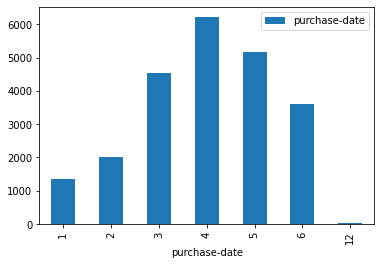

In [25]:
f['purchase-date'] = pd.to_datetime(f['purchase-date'], errors='coerce')
df = f[['purchase-date']]
df.groupby(df["purchase-date"].dt.month).count().plot(kind="bar")

In [27]:
f = f[(f['Sr name'] == "PartsUnlimited")]

In [40]:
p1 = f['Gross Profit'].groupby(f['brand_id']).agg('sum').reset_index(name='sum').sort_values(['sum'], ascending=[False]).head(30)
del p1['sum']

In [58]:
f1 = pd.merge(f, p1, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()
df3 = f1['Gross Profit'].groupby(f1['brand_id']).agg('sum').reset_index(name='sum')
df4 = f1['Gross Profit'].groupby(f1['brand_id']).agg('count').reset_index(name='count')
p2 = pd.merge(df3, df4, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()


p2['percent %'] = (p2['sum'] / p2['sum'].sum()) * 100
#p1 = p1.round(1)

total = p2.apply(np.sum)
total['brand_id'] = 'TOTAL'
p2 = pd.concat([p2, (pd.DataFrame(total.values, index=total.keys()).T)])

p2["mean $"] = p2['sum']/p2['count']

p2[["mean $", 'percent %']] = p2[["mean $", 'percent %']].astype(float).round(1)
p2 = p2.sort_values('sum', ascending=False).round(1).reset_index()
del p2['index']

print("")
print("")
print("Top 30 brands by profit between ", date1, " and ", date2)

p2



Top 30 brands by profit between  2020-12-31  and  2021-07-01


,brand_id,sum,count,percent %,mean $
0,TOTAL,25582.21,1918,100.0,13.3
1,KLOCKWERKS,4050.46,113,15.8,35.8
2,CUSTOMDYNAMICS,4039.91,157,15.8,25.7
3,DUNLOP,3076.34,165,12.0,18.6
4,EBC,1539.66,230,6.0,6.7
5,BASSANIXHAUST,1434.41,18,5.6,79.7
6,KURYAKYN,1408.33,87,5.5,16.2
7,BFGOODRICH,1124.24,12,4.4,93.7
8,EMGO,858.5,181,3.4,4.7
9,SADDLEMEN,839.51,27,3.3,31.1


In [50]:
p2.to_excel(r'C:\Users\Mykola\Desktop\rollun\profit\PU1.xlsx', sheet_name='Profit_Jan_June_21', index = False)

In [59]:
print("")
print("")
print("Top 30 brands by revenue between ", date1, " and ", date2)

f1 = pd.merge(f, p1, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()
df3 = f1['item-price'].groupby(f1['brand_id']).agg('sum').reset_index(name='sum')
df4 = f1['item-price'].groupby(f1['brand_id']).agg('count').reset_index(name='count')
p2 = pd.merge(df3, df4, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()


p2['percent %'] = (p2['sum'] / p2['sum'].sum()) * 100
#p1 = p1.round(1)

total = p2.apply(np.sum)
total['brand_id'] = 'TOTAL'
p2 = pd.concat([p2, (pd.DataFrame(total.values, index=total.keys()).T)])

p2["mean $"] = p2['sum']/p2['count']

p2[["mean $", 'percent %']] = p2[["mean $", 'percent %']].astype(float).round(1)
p2 = p2.sort_values('sum', ascending=False).round(1).reset_index()
del p2['index']
p2



Top 30 brands by revenue between  2020-12-31  and  2021-07-01


,brand_id,sum,count,percent %,mean $
0,TOTAL,160626.63,1918,100.0,83.7
1,CUSTOMDYNAMICS,24247.42,157,15.1,154.4
2,KLOCKWERKS,24171.25,113,15.0,213.9
3,DUNLOP,18636.55,165,11.6,112.9
4,KURYAKYN,12224.09,87,7.6,140.5
5,EBC,10728.23,230,6.7,46.6
6,BASSANIXHAUST,7469.1,18,4.6,414.9
7,SADDLEMEN,6755.56,27,4.2,250.2
8,BFGOODRICH,6465.69,12,4.0,538.8
9,EMGO,6192.11,181,3.9,34.2


In [52]:
p2.to_excel(r'C:\Users\Mykola\Desktop\rollun\profit\PU2.xlsx', sheet_name='Revenue_Jan_June_21', index = False)

In [60]:
f1 = pd.merge(f, p1, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()
f1['purchase-date'] = pd.to_datetime(f1['purchase-date'], errors='coerce')
f1 = f1[['Gross Profit','brand_id','purchase-date']]
f2 = f1.groupby([(f1['brand_id']), (f1["purchase-date"].dt.month)]).agg('sum').reset_index()

pd.crosstab(f2["brand_id"], f2["purchase-date"])
a = pd.pivot_table(f2, values = 'Gross Profit', index=['brand_id'], columns = 'purchase-date').reset_index()
a.columns = ['brand_id', 'Jan','Feb','Mar','Apr','May','June']
a = a.sort_values(['June'], ascending=[False]).reset_index()
del a['index']

print("")
print("")
print("Top 30 brands by profit between ", date1, " and ", date2)

a



Top 30 brands by profit between  2020-12-31  and  2021-07-01


,brand_id,Jan,Feb,Mar,Apr,May,June
0,CUSTOMDYNAMICS,-0.32,48.26,260.60,1536.02,722.49,1472.86
1,KLOCKWERKS,NaN,15.69,478.49,2384.16,326.88,845.24
2,KURYAKYN,2.13,143.82,146.20,242.96,109.56,763.66
3,BFGOODRICH,NaN,33.49,417.36,157.16,69.13,447.10
4,DUNLOP,NaN,383.03,1006.83,716.64,589.11,380.73
5,NGK,-0.23,25.89,1.10,112.14,126.47,273.33
6,BASSANIXHAUST,NaN,NaN,231.91,612.94,354.64,234.92
7,EBC,79.62,86.92,353.24,447.53,368.59,203.76
8,EMGO,1.58,21.28,183.33,296.41,180.01,175.89
9,IRC,NaN,47.13,104.75,10.31,65.08,157.92


In [54]:
a.to_excel(r'C:\Users\Mykola\Desktop\rollun\profit\PU3.xlsx', sheet_name='Profit_per_month_Jan_June_21', index = False)

In [61]:
f1 = pd.merge(f, p1, left_on=["brand_id"], right_on=['brand_id'], how='inner').drop_duplicates()
f1['purchase-date'] = pd.to_datetime(f1['purchase-date'], errors='coerce')
f1 = f1[['item-price','brand_id','purchase-date']]
f2 = f1.groupby([(f1['brand_id']), (f1["purchase-date"].dt.month)]).agg('sum').reset_index()

pd.crosstab(f2["brand_id"], f2["purchase-date"])
a = pd.pivot_table(f2, values = 'item-price', index=['brand_id'], columns = 'purchase-date').reset_index()
a.columns = ['brand_id', 'Jan','Feb','Mar','Apr','May','June']
a = a.sort_values(['June'], ascending=[False]).reset_index()
del a['index']

print("")
print("")
print("Top 30 brands by revenue between ", date1, " and ", date2)

a



Top 30 brands by revenue between  2020-12-31  and  2021-07-01


,brand_id,Jan,Feb,Mar,Apr,May,June
0,CUSTOMDYNAMICS,48.85,223.48,1496.23,9243.60,4543.41,8691.85
1,KURYAKYN,30.05,1102.44,824.73,1656.11,885.23,7725.53
2,KLOCKWERKS,NaN,105.95,2939.45,13757.70,2209.40,5158.75
3,DUNLOP,NaN,2634.59,5118.87,4641.14,2913.36,3328.59
4,BFGOODRICH,NaN,218.99,1970.91,875.96,597.97,2801.86
5,EBC,651.80,642.46,2231.84,2275.88,3035.60,1890.65
6,EMGO,15.19,132.35,688.92,1652.23,1841.06,1862.36
7,BASSANIXHAUST,NaN,NaN,879.90,3119.60,2069.70,1399.90
8,CONTINENTAL,288.05,234.02,NaN,NaN,777.01,1201.21
9,IRC,NaN,209.82,292.54,497.85,482.96,1047.48


In [56]:
a.to_excel(r'C:\Users\Mykola\Desktop\rollun\profit\PU4.xlsx', sheet_name='Revenue_per_month_Jan_June_21', index = False)